
# Certificate Analysis Tool

## 1. プログラムの概要と目的
このプロジェクトは、複数のTLS/SSL証明書形式（PEM、DER、PKCS#7（PEMおよびDER））に対応した証明書解析ツールです。  
主な目的は、証明書に含まれるドメイン情報（Subject Alternative Name や Common Name）を抽出し、統計情報（全体数、解析成功率、マルチドメイン証明書の割合など）を算出することにあります。また、各形式ごとの統計を視覚化することで、証明書の運用状況や品質を把握できるように設計されています。

## 2. 主な機能と特徴
- **複数形式対応**: PEM、DER、PKCS#7（PEMおよびDER）の証明書を自動判別して解析
- **ドメイン抽出**: SAN（Subject Alternative Name）やCN（Common Name）からドメイン情報を取得
- **フォールバック機能**: プライマリ証明書の解析が失敗した場合、フォールバック証明書で再試行
- **統計情報の集計**: 解析成功率、マルチドメイン証明書の割合、各形式の出現数と割合を算出
- **可視化機能**: 円グラフ、ヒストグラム、棒グラフなどで統計情報を視覚化
- **CSV出力**: 詳細な解析結果をCSVファイルに保存可能
- **データベース連携**: PostgreSQLデータベースから証明書データを取得

## 3. 必要な依存関係とインストール手順

### 必要なPythonパッケージ
以下のパッケージが必要です。インストールは `pip` を用いてください。

```bash
pip install pandas numpy sqlalchemy cryptography matplotlib japanize-matplotlib
```

### データベース要件
- **PostgreSQL**: 証明書データは PostgreSQL データベースに格納されている必要があります。
- **必要なテーブル・カラム**:  
  例: テーブル `website_data` に対して、`domain`, `https_certificate_body`, `https_certificate_all`, `status` などのカラムが必要です。

### 設定ファイルの準備方法
プロジェクトルート（または指定されたディレクトリ）に、データベース接続情報を記述したJSON形式の設定ファイルを配置します。  
例: `/home/asomura/waseda/nextstep/RAPIDS/config/database.json`

```json
{
  "database": {
    "user": "your_db_username",
    "password": "your_db_password"
  }
}
```

## 4. 使用方法

### 基本的な実行手順
1. 必要なPythonパッケージのインストール
2. 設定ファイル（database.json）の作成
3. プログラムを実行

```bash
python 05_certificate_analysis_multi_format.ipynb
```

### 設定ファイルの書き方
- 設定ファイルはJSON形式で、`database` オブジェクト内に `user` と `password` を記述します。
- ファイルパスは、プログラム内で固定のパス（例：`/home/asomura/waseda/nextstep/RAPIDS/config/database.json`）となっているので、環境に合わせて変更してください。

### 主要なメソッドの使用例
以下は、主要なメソッドを用いた簡単な使用例です。

```python
from certificate_analyzer import CertificateAnalyzer

# 設定ファイルのパスを指定してインスタンスを生成
analyzer = CertificateAnalyzer("path/to/database.json")

# 単一の証明書データからドメイン情報を抽出（フォールバック機能付き）
primary_cert_data = "-----BEGIN CERTIFICATE-----\n..."
fallback_cert_data = "-----BEGIN PKCS7-----\n..."
result = analyzer.extract_domains_with_fallback(primary_cert_data, fallback_cert_data, "example.com")

print("解析結果:", result)
```

## 5. 出力形式と解釈方法

### 生成されるファイルの説明
- **CSVファイル**: 詳細な解析結果が保存されます。  
  - 各行には、元のドメイン、抽出されたドメインリスト、ドメイン数、マルチドメインか否か、エラー情報、使用された証明書形式（cert_format）などが含まれます。

### 分析結果の見方
- **全体統計**: 各DBの解析件数、有効/無効証明書数、マルチドメイン証明書の割合、平均および最大のドメイン数が表示されます。
- **証明書形式別統計**: PEM、DER、PKCS7_PEM、PKCS7_DER それぞれの出現数、解析成功率、マルチドメイン証明書の割合が出力されます。

### グラフの解釈方法
- **円グラフ**:  
  - 証明書の有効性（有効/無効）およびフォールバック利用状況の割合を表示します。
- **ヒストグラム**:  
  - 各証明書に含まれるドメイン数の分布を表示し、全体の傾向を把握できます。
- **棒グラフ**:  
  - 各証明書形式ごとの出現数、解析成功率、マルチドメイン割合を比較可能です。

## 6. エラーハンドリングと注意点

### 一般的なエラーとその対処法
- **Empty Certificate Data**: 証明書データが空の場合、適切な値が入力されているか確認してください。
- **Hex形式エラー**: DER形式の証明書データが16進数表記の場合、データ形式に問題がないか確認してください。
- **ASN.1 パースエラー**: 証明書のエンコーディングに問題がある場合、データが正しい証明書であるか確認してください。

### デバッグのヒント
- **ログ出力**: プログラム内の print 文やエラー統計を参考に、どの処理で失敗しているかを特定してください。
- **CSVファイルの確認**: 出力されたCSVファイルでエラー内容や解析結果を確認し、問題箇所を特定するのに役立ててください。
- **設定ファイルの検証**: データベース接続情報やファイルパスが正しいかどうかを再度確認してください。

## 7. ライセンスと謝辞

### ライセンス
このプロジェクトは [MIT License](https://opensource.org/licenses/MIT) の下で公開されています。  
（※必要に応じて、他のライセンス情報に変更してください）

### 謝辞
- 本ツールは、Pythonの [cryptography](https://cryptography.io/) ライブラリを用いて証明書の解析を行っています。
- プロジェクトのベースとなるコードは RAPIDS チームのリポジトリから派生しています。
- ご意見や改善点があれば、ぜひご連絡ください。

---

以上
```

---

このREADME例は、実際のコード例や設定ファイルの記述例も含め、利用者が環境構築から実行、解析結果の解釈までスムーズに行えるよう、構造化された内容となっています。必要に応じてプロジェクト固有の情報を追加・修正してください。


website_data の分析を開始...
取得したレコード数: 12072

normal_sites の分析を開始...
取得したレコード数: 9591

=== 証明書分析サマリー ===

website_data:
総証明書数: 12,072
有効な証明書: 12,071 (100.0%)
無効な証明書: 1 (0.0%)

マルチドメイン証明書数: 8,962
マルチドメイン証明書の割合: 74.2%
証明書あたりの平均ドメイン数: 30.11
証明書あたりの最大ドメイン数: 139
フォールバック利用証明書数: 118 (1.0%)

ドメイン数の分布:
1ドメイン: 3,109 件 (25.8%)
2ドメイン: 3,411 件 (28.3%)
3ドメイン: 202 件 (1.7%)
4ドメイン: 137 件 (1.1%)
5ドメイン: 325 件 (2.7%)
6ドメイン: 73 件 (0.6%)
7ドメイン: 201 件 (1.7%)
8ドメイン: 181 件 (1.5%)
9ドメイン: 92 件 (0.8%)
10ドメイン: 110 件 (0.9%)
11ドメイン: 35 件 (0.3%)
12ドメイン: 39 件 (0.3%)
13ドメイン: 18 件 (0.1%)
14ドメイン: 6 件 (0.0%)
15ドメイン: 15 件 (0.1%)
16ドメイン: 26 件 (0.2%)
17ドメイン: 23 件 (0.2%)
18ドメイン: 3 件 (0.0%)
19ドメイン: 5 件 (0.0%)
20ドメイン: 71 件 (0.6%)
21ドメイン: 2 件 (0.0%)
22ドメイン: 4 件 (0.0%)
23ドメイン: 1 件 (0.0%)
24ドメイン: 35 件 (0.3%)
25ドメイン: 2 件 (0.0%)
26ドメイン: 11 件 (0.1%)
28ドメイン: 2 件 (0.0%)
29ドメイン: 6 件 (0.0%)
30ドメイン: 94 件 (0.8%)
31ドメイン: 1 件 (0.0%)
32ドメイン: 8 件 (0.1%)
33ドメイン: 1 件 (0.0%)
34ドメイン: 2 件 (0.0%)
35ドメイン: 5 件 (0.0%)
36ドメイン: 2 件 (0.0%)
38ドメイン: 3 件 (0.0%)
4

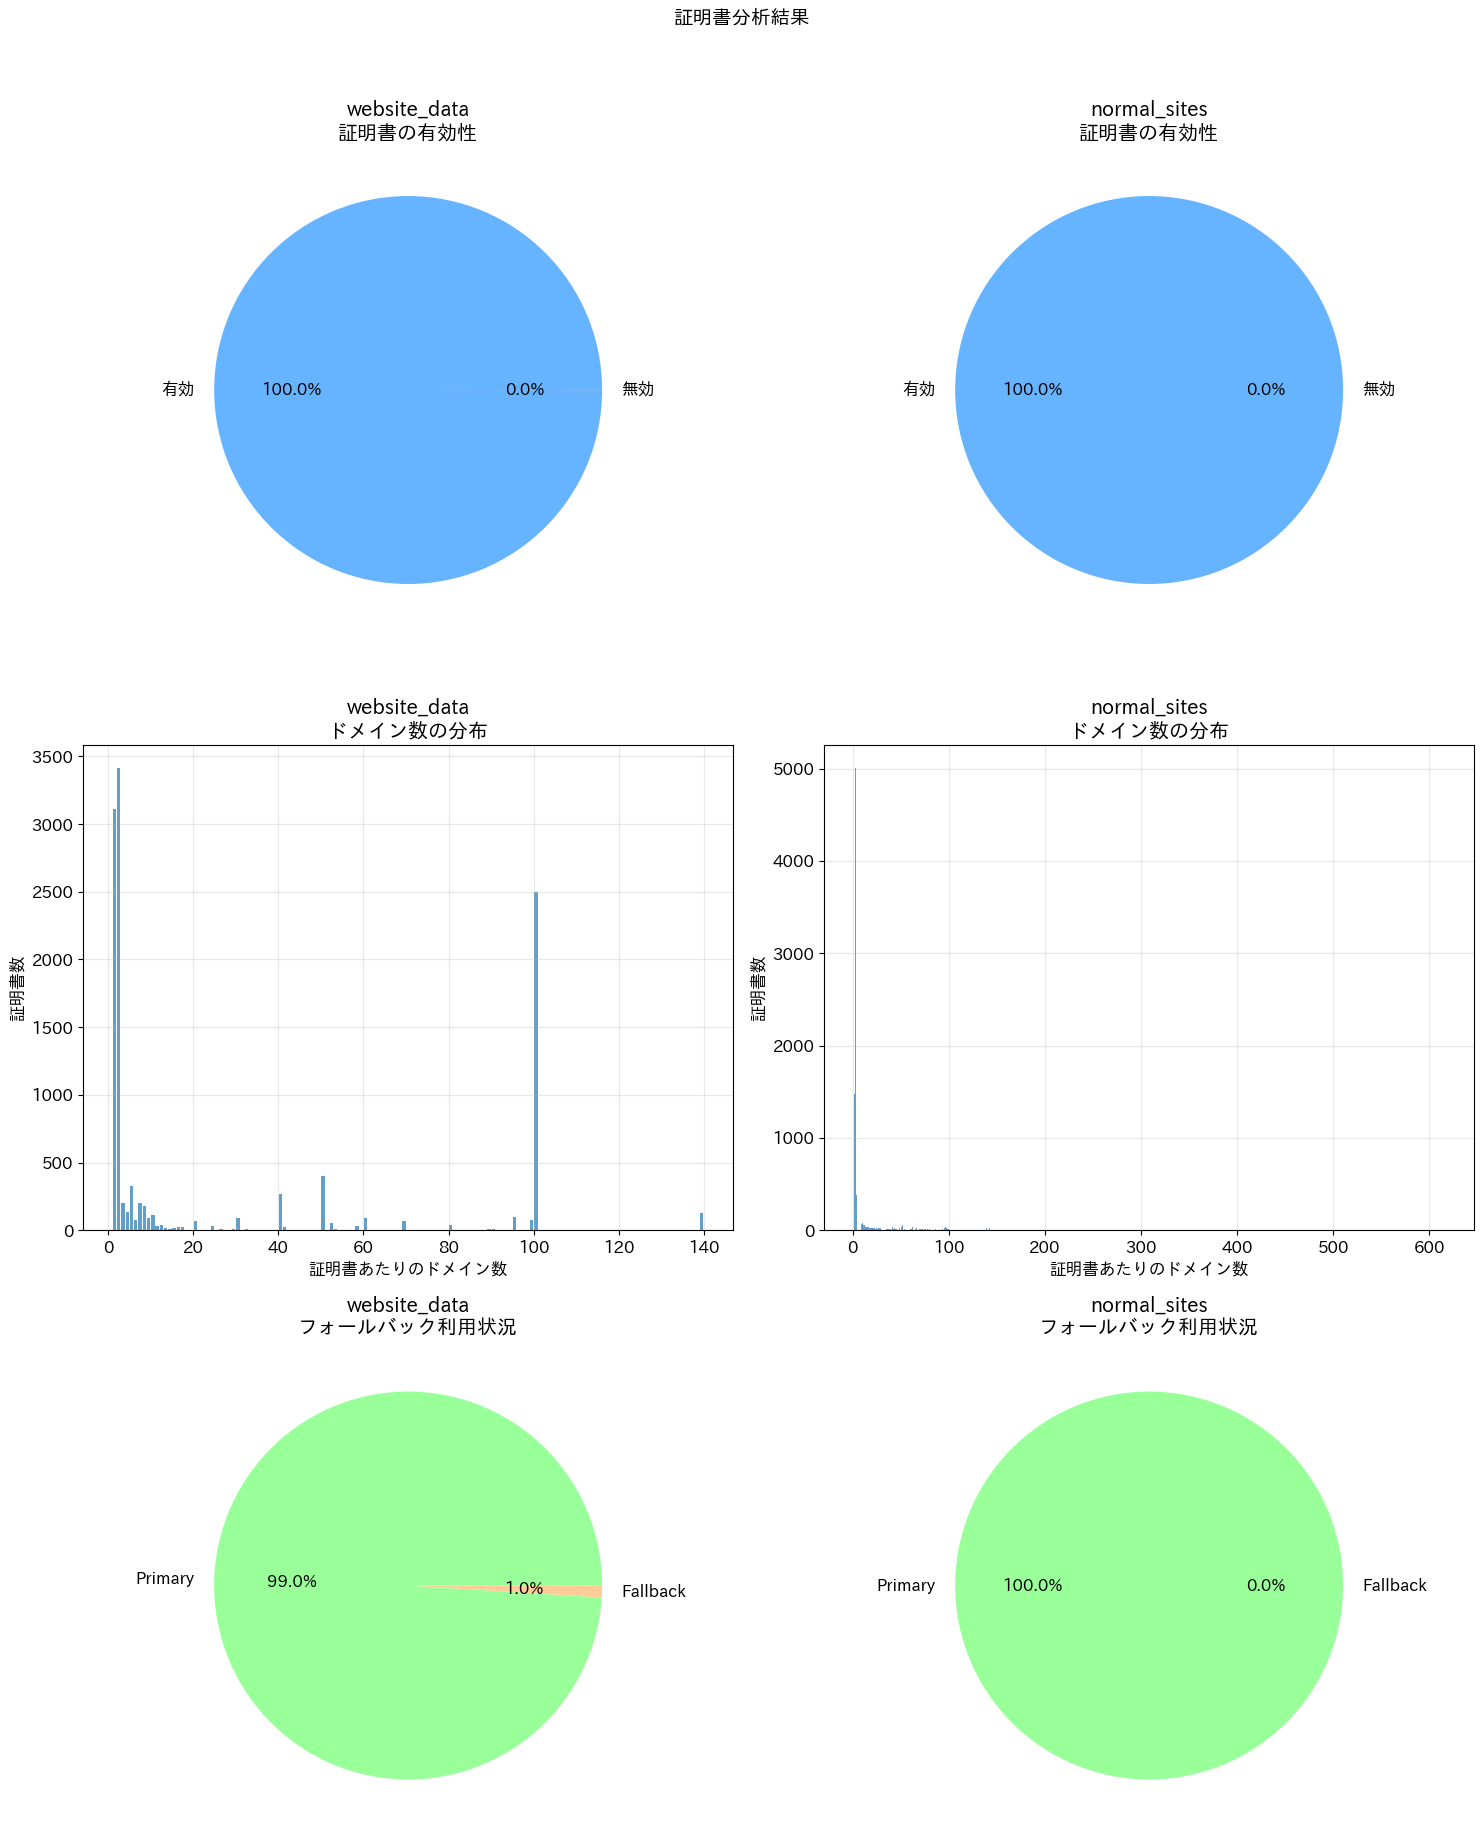

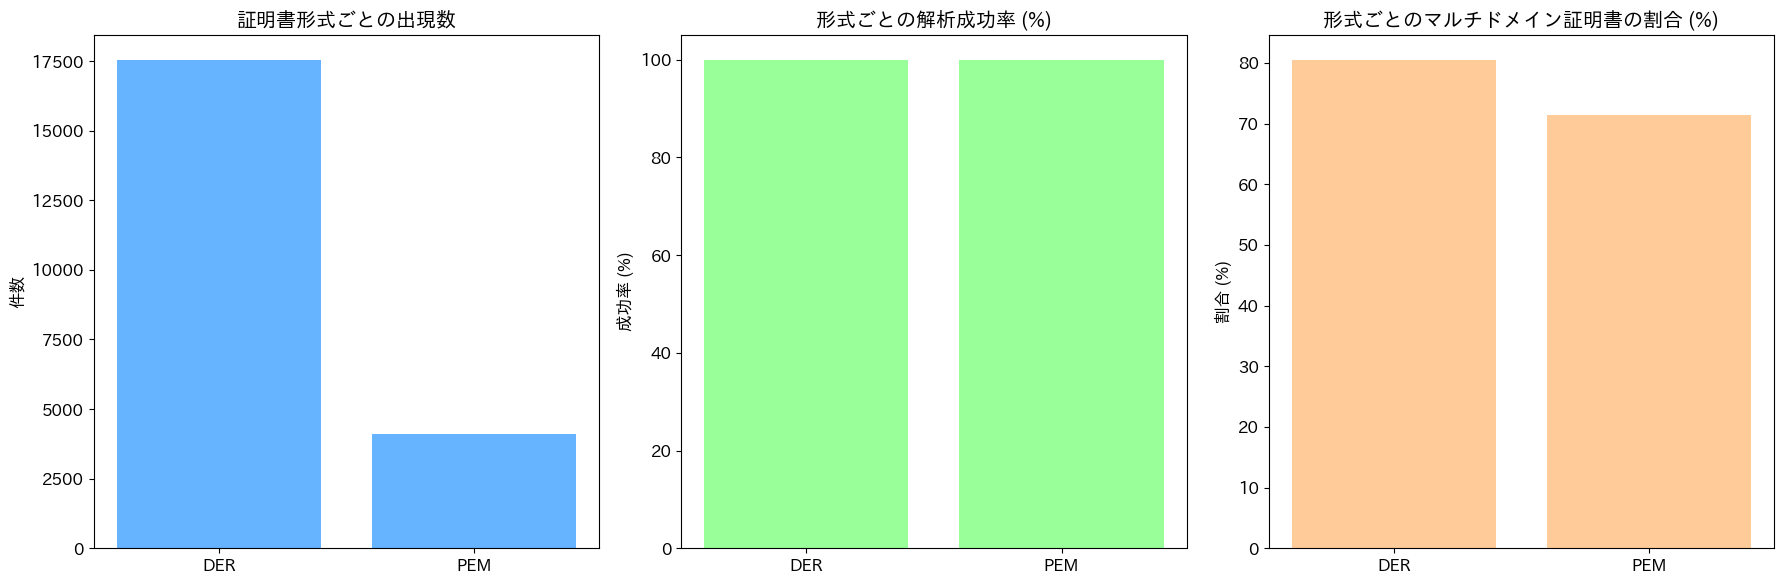

In [1]:
# 05_certificate_analysis_multi_format.ipynb 拡張版
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import json
from cryptography import x509
from cryptography.hazmat.backends import default_backend
import binascii
import matplotlib.pyplot as plt
import japanize_matplotlib
from typing import Dict, List, Optional, Tuple
import re
from datetime import datetime
from pathlib import Path

class CertificateAnalyzer:
    """証明書の分析を行うクラス（複数の証明書形式に対応）"""
    
    def __init__(self, config_path: str):
        """初期化"""
        # 設定の読み込み
        with open(config_path) as f:
            self.config = json.load(f)['database']
        
        # 出力ディレクトリの設定
        self.output_dir = Path('/home/asomura/waseda/nextstep/RAPIDS/reports/certificate_analysis')
        self.output_dir.mkdir(parents=True, exist_ok=True)
        
        # フォント設定
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['IPAexGothic', 'IPAPGothic', 'Yu Gothic']
        
        # エラー統計の初期化
        self.error_stats = {
            'total_processed': 0,
            'success': 0,
            'failures': {
                'asn1_error': 0,
                'hex_error': 0,
                'parse_error': 0,
                'no_domain_error': 0,
                'other_error': 0
            }
        }
        
        # 詳細な結果格納用
        self.detailed_results = []
    
    def get_engine(self, db_name: str) -> create_engine:
        """データベース接続エンジンを取得"""
        host = '192.168.1.92' if db_name == 'website_data' else '192.168.1.92'
        return create_engine(
            f'postgresql://{self.config["user"]}:{self.config["password"]}@{host}/{db_name}'
        )
    
    def clean_cert_data(self, cert_data: str) -> Optional[bytes]:
        """
        DER形式の証明書が16進数文字列として与えられた場合のクリーニング。
        PEMやPKCS#7の場合はヘッダーが含まれるため、この処理はスキップされます。
        """
        try:
            if not cert_data:
                return None
            
            # すでにPEM/PKCS7形式の場合はそのまま返す（バイナリ変換は行わない）
            if "-----BEGIN" in cert_data:
                return cert_data.encode('utf-8')
            
            # \xプレフィックスとスペースの除去（hex形式の場合）
            hex_str = cert_data.replace('\\x', '').replace(' ', '')
            
            # 16進数以外の文字を除去
            hex_str = re.sub(r'[^0-9a-fA-F]', '', hex_str)
            
            # 奇数長の場合、0を追加
            if len(hex_str) % 2 != 0:
                hex_str += '0'
            
            return binascii.unhexlify(hex_str)
            
        except (binascii.Error, ValueError) as e:
            self.error_stats['failures']['hex_error'] += 1
            return None
    
    def detect_cert_format(self, cert_data: str) -> str:
        """証明書データから形式を簡易判定する"""
        if not cert_data:
            return "Unknown"
        if "-----BEGIN PKCS7-----" in cert_data:
            return "PKCS7_PEM"
        elif "-----BEGIN CERTIFICATE-----" in cert_data:
            return "PEM"
        else:
            return "DER"
    
    def load_certificate_from_data(self, cert_data: str) -> Tuple[x509.Certificate, str]:
        """
        証明書データから x509.Certificate オブジェクトと証明書形式（PEM, DER, PKCS7_PEM, PKCS7_DER）を返す。
        """
        if not cert_data:
            raise ValueError("Empty certificate data")
        
        # クリーンなデータを取得
        raw_data = self.clean_cert_data(cert_data)
        if raw_data is None:
            raise ValueError("Invalid certificate data")
        
        try:
            # PEM形式の場合：-----BEGIN CERTIFICATE-----
            if b"-----BEGIN CERTIFICATE-----" in raw_data:
                cert_format = "PEM"
                # 複数の証明書が連結されている場合、最初のものを使用
                pem_certs = re.findall(b'(-----BEGIN CERTIFICATE-----.*?-----END CERTIFICATE-----)', raw_data, re.DOTALL)
                if pem_certs:
                    cert = x509.load_pem_x509_certificate(pem_certs[0], default_backend())
                    return cert, cert_format
                else:
                    raise ValueError("No valid PEM certificate found")
            
            # PEM形式のPKCS7の場合
            if b"-----BEGIN PKCS7-----" in raw_data:
                cert_format = "PKCS7_PEM"
                from cryptography.hazmat.primitives.serialization import pkcs7
                pkcs7_certs = pkcs7.load_pem_pkcs7_certificates(raw_data)
                if pkcs7_certs and len(pkcs7_certs) > 0:
                    return pkcs7_certs[0], cert_format
                else:
                    raise ValueError("No valid PEM PKCS7 certificates found")
            
            # DER形式の場合（raw_dataはバイナリ）
            try:
                cert = x509.load_der_x509_certificate(raw_data, default_backend())
                cert_format = "DER"
                return cert, cert_format
            except Exception as e:
                # DER形式のPKCS7を試す
                from cryptography.hazmat.primitives.serialization import pkcs7
                pkcs7_certs = pkcs7.load_der_pkcs7_certificates(raw_data)
                if pkcs7_certs and len(pkcs7_certs) > 0:
                    cert_format = "PKCS7_DER"
                    return pkcs7_certs[0], cert_format
                else:
                    raise e
        
        except Exception as e:
            raise e
    
    def _create_error_result(self, domain: str, error_msg: str, cert_format: str = "Unknown") -> Dict:
        """エラー結果の生成（形式情報付き）"""
        return {
            'original_domain': domain,
            'domain_count': 0,
            'domains': [],
            'is_multi_domain': False,
            'error': error_msg,
            'cert_format': cert_format
        }
    
    def extract_domains(self, cert_data: str, original_domain: str) -> Dict:
        """証明書からドメイン情報を抽出（各種証明書形式に対応）"""
        self.error_stats['total_processed'] += 1
        
        try:
            # 証明書データから x509.Certificate オブジェクトと形式を取得
            cert, cert_format = self.load_certificate_from_data(cert_data)
            domains = set()  # 重複を避けるために set を使用
            
            # SAN (Subject Alternative Name) 拡張から取得を試みる
            for extension in cert.extensions:
                if isinstance(extension.value, x509.SubjectAlternativeName):
                    san_domains = [name.value for name in extension.value 
                                   if isinstance(name, x509.DNSName)]
                    domains.update(san_domains)
            
            # Common Name からも取得（エラーがあっても続行）
            try:
                cn = cert.subject.get_attributes_for_oid(x509.NameOID.COMMON_NAME)
                if cn:
                    domains.add(cn[0].value)
            except Exception:
                pass
            
            # ドメインリストに変換
            domain_list = sorted(list(domains))
            
            # 最低1つのドメインがなければエラー
            if not domain_list:
                self.error_stats['failures']['no_domain_error'] += 1
                return self._create_error_result(original_domain, "No valid domains found", cert_format)
            
            self.error_stats['success'] += 1
            
            return {
                'original_domain': original_domain,
                'domain_count': len(domain_list),
                'domains': domain_list,
                'is_multi_domain': len(domain_list) > 1,
                'error': None,
                'cert_format': cert_format
            }
            
        except ValueError as e:
            self.error_stats['failures']['parse_error'] += 1
            cert_format = self.detect_cert_format(cert_data)
            return self._create_error_result(original_domain, f"Parse error: {str(e)}", cert_format)
            
        except Exception as e:
            cert_format = self.detect_cert_format(cert_data)
            if "error parsing asn1 value" in str(e).lower():
                self.error_stats['failures']['asn1_error'] += 1
                return self._create_error_result(original_domain, "ASN.1 parse error", cert_format)
            else:
                self.error_stats['failures']['other_error'] += 1
                return self._create_error_result(original_domain, f"Error: {str(e)}", cert_format)
    
    def extract_domains_with_fallback(self, primary_cert_data: str, fallback_cert_data: Optional[str], original_domain: str) -> Dict:
        """
        primary の証明書データでエラーの場合、fallback のデータで再試行する。
        fallback で成功した場合は、'fallback_used': True を付加する。
        """
        result = self.extract_domains(primary_cert_data, original_domain)
        if result['error'] is None:
            result['fallback_used'] = False
            return result
        else:
            # primary でエラーの場合、fallback のデータが存在すれば再試行
            if fallback_cert_data:
                fallback_result = self.extract_domains(fallback_cert_data, original_domain)
                if fallback_result['error'] is None:
                    fallback_result['fallback_used'] = True
                    return fallback_result
                else:
                    # 両方失敗の場合、エラー内容を併記
                    return self._create_error_result(
                        original_domain,
                        f"Primary error: {result['error']} / Fallback error: {fallback_result['error']}",
                        fallback_result.get('cert_format', "Unknown")
                    )
            else:
                return result
    
    def analyze_certificates(self, db_name: str) -> Dict:
        """証明書の分析を実行（フォールバック機能付き）"""
        print(f"\n{db_name} の分析を開始...")
        
        # fallback カラムも取得
        query = """
            SELECT domain, https_certificate_body, https_certificate_all
            FROM website_data 
            WHERE status = 7 
              AND (https_certificate_body IS NOT NULL OR https_certificate_all IS NOT NULL);
        """
        engine = self.get_engine(db_name)
        df = pd.read_sql_query(query, engine)
        print(f"取得したレコード数: {len(df)}")
        
        results = []
        for _, row in df.iterrows():
            primary_cert = row['https_certificate_body']
            fallback_cert = row['https_certificate_all']
            result = self.extract_domains_with_fallback(primary_cert, fallback_cert, row['domain'])
            results.append(result)
            self.detailed_results.append({
                **result, 
                'database': db_name,
                'timestamp': datetime.now()
            })
        
        # 有効な結果のみを用いて統計を計算
        valid_results = [r for r in results if r['domain_count'] > 0]
        total_certs = len(results)
        total_valid = len(valid_results)
        multi_domain_certs = sum(1 for r in valid_results if r['is_multi_domain'])
        domain_counts = [r['domain_count'] for r in valid_results]
        fallback_used_count = sum(1 for r in valid_results if r.get('fallback_used', False))
        
        return {
            'total_certificates': total_certs,
            'valid_certificates': total_valid,
            'invalid_certificates': total_certs - total_valid,
            'multi_domain_certificates': multi_domain_certs,
            'multi_domain_ratio': multi_domain_certs / total_valid if total_valid > 0 else 0,
            'domain_counts': domain_counts,
            'avg_domains_per_cert': np.mean(domain_counts) if domain_counts else 0,
            'max_domains_per_cert': max(domain_counts) if domain_counts else 0,
            'fallback_used_count': fallback_used_count,
            'fallback_used_ratio': fallback_used_count / total_valid if total_valid > 0 else 0,
            'results': results
        }
    
    def save_detailed_results(self, output_path: Optional[str] = None):
        """詳細な分析結果を CSV ファイルとして保存"""
        if not output_path:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            output_path = self.output_dir / f'cert_analysis_{timestamp}.csv'
        
        df = pd.DataFrame(self.detailed_results)
        df['domains'] = df['domains'].apply(lambda x: ','.join(x) if isinstance(x, list) else '')
        df.to_csv(output_path, index=False)
        print(f"\n詳細な分析結果を保存: {output_path}")
    
    def print_summary(self, results: Dict[str, Dict]):
        """分析結果のサマリーを表示"""
        print("\n=== 証明書分析サマリー ===")
        
        for db_name, data in results.items():
            print(f"\n{db_name}:")
            print(f"総証明書数: {data['total_certificates']:,}")
            print(f"有効な証明書: {data['valid_certificates']:,} ({data['valid_certificates']/data['total_certificates']*100:.1f}%)")
            print(f"無効な証明書: {data['invalid_certificates']:,} ({data['invalid_certificates']/data['total_certificates']*100:.1f}%)")
            
            if data['valid_certificates'] > 0:
                print(f"\nマルチドメイン証明書数: {data['multi_domain_certificates']:,}")
                print(f"マルチドメイン証明書の割合: {data['multi_domain_ratio']:.1%}")
                print(f"証明書あたりの平均ドメイン数: {data['avg_domains_per_cert']:.2f}")
                print(f"証明書あたりの最大ドメイン数: {data['max_domains_per_cert']}")
                print(f"フォールバック利用証明書数: {data['fallback_used_count']:,} ({data['fallback_used_ratio']:.1%})")
                
                domain_counts = pd.Series(data['domain_counts'])
                print("\nドメイン数の分布:")
                for count, freq in domain_counts.value_counts().sort_index().items():
                    print(f"{count}ドメイン: {freq:,} 件 ({freq/len(domain_counts):.1%})")
    
    def print_error_stats(self):
        """エラー統計の表示"""
        print("\n=== エラー統計 ===")
        total = self.error_stats['total_processed']
        print(f"処理した証明書の総数: {total:,}")
        print(f"成功: {self.error_stats['success']:,} ({self.error_stats['success']/total*100:.1f}%)")
        
        print("\nエラーの内訳:")
        for error_type, count in self.error_stats['failures'].items():
            if count > 0:
                print(f"- {error_type}: {count:,} ({count/total*100:.1f}%)")
    
    def plot_results(self, results: Dict[str, Dict]):
        """分析結果の可視化（フォールバック利用状況も表示）"""
        plt.rcParams['font.size'] = 12
        
        # 3行2列のグリッド
        fig, axes = plt.subplots(3, 2, figsize=(15, 18))
        fig.suptitle('証明書分析結果', y=1.02, fontsize=14)
        
        for i, (db_name, data) in enumerate(results.items()):
            col = i  # 0: website_data, 1: normal_sites
            if data['total_certificates'] == 0:
                continue
            
            # 1. 証明書の有効性の円グラフ
            valid_ratio = data['valid_certificates'] / data['total_certificates']
            axes[0, col].pie([valid_ratio, 1-valid_ratio],
                             labels=['有効', '無効'],
                             autopct='%1.1f%%',
                             colors=['#66b3ff', '#ff9999'])
            axes[0, col].set_title(f'{db_name}\n証明書の有効性')
            
            # 2. ドメイン数の分布（ヒストグラム）
            if data['valid_certificates'] > 0 and data['domain_counts']:
                domain_counts = pd.Series(data['domain_counts'])
                axes[1, col].hist(domain_counts, 
                                  bins=range(1, int(max(domain_counts)) + 2),
                                  alpha=0.7,
                                  rwidth=0.8)
                axes[1, col].set_title(f'{db_name}\nドメイン数の分布')
                axes[1, col].set_xlabel('証明書あたりのドメイン数')
                axes[1, col].set_ylabel('証明書数')
                axes[1, col].grid(True, alpha=0.3)
            else:
                axes[1, col].text(0.5, 0.5, 'データなし', horizontalalignment='center')
                axes[1, col].set_title(f'{db_name}\nドメイン数の分布')
            
            # 3. フォールバック利用状況の円グラフ
            if data['valid_certificates'] > 0:
                fallback_count = data['fallback_used_count']
                primary_count = data['valid_certificates'] - fallback_count
                axes[2, col].pie([primary_count, fallback_count],
                                 labels=['Primary', 'Fallback'],
                                 autopct='%1.1f%%',
                                 colors=['#99ff99', '#ffcc99'])
                axes[2, col].set_title(f'{db_name}\nフォールバック利用状況')
            else:
                axes[2, col].text(0.5, 0.5, 'データなし', horizontalalignment='center')
                axes[2, col].set_title(f'{db_name}\nフォールバック利用状況')
        
        plt.tight_layout()
    
    def compute_cert_format_statistics(self, results: List[Dict]) -> Dict[str, Dict]:
        """
        各証明書形式（PEM, DER, PKCS7_PEM, PKCS7_DER）ごとの出現数、解析成功率、
        マルチドメイン証明書の割合を計算する。
        """
        stats = {}
        total = len(results)
        for res in results:
            fmt = res.get('cert_format', 'Unknown')
            if fmt not in stats:
                stats[fmt] = {'total_count': 0, 'success_count': 0, 'multi_domain_success_count': 0}
            stats[fmt]['total_count'] += 1
            if res.get('error') is None:
                stats[fmt]['success_count'] += 1
                if res.get('is_multi_domain'):
                    stats[fmt]['multi_domain_success_count'] += 1
        for fmt, data in stats.items():
            data['occurrence_ratio'] = data['total_count'] / total if total > 0 else 0
            data['success_rate'] = data['success_count'] / data['total_count'] if data['total_count'] > 0 else 0
            data['multi_domain_ratio'] = (data['multi_domain_success_count'] / data['success_count']
                                          if data['success_count'] > 0 else 0)
        return stats
    
    def plot_cert_format_statistics(self, stats: Dict[str, Dict]):
        """
        各証明書形式ごとの出現数、解析成功率、マルチドメイン証明書の割合を棒グラフで可視化する。
        """
        formats = list(stats.keys())
        counts = [stats[f]['total_count'] for f in formats]
        success_rates = [stats[f]['success_rate']*100 for f in formats]
        multi_domain_ratios = [stats[f]['multi_domain_ratio']*100 for f in formats]
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        # 出現数の棒グラフ
        axes[0].bar(formats, counts, color='#66b3ff')
        axes[0].set_title('証明書形式ごとの出現数')
        axes[0].set_ylabel('件数')
        
        # 解析成功率の棒グラフ
        axes[1].bar(formats, success_rates, color='#99ff99')
        axes[1].set_title('形式ごとの解析成功率 (%)')
        axes[1].set_ylabel('成功率 (%)')
        
        # マルチドメイン証明書の割合の棒グラフ
        axes[2].bar(formats, multi_domain_ratios, color='#ffcc99')
        axes[2].set_title('形式ごとのマルチドメイン証明書の割合 (%)')
        axes[2].set_ylabel('割合 (%)')
        
        plt.tight_layout()
        plt.show()

def main():
    # 設定ファイルのパス
    config_path = '/home/asomura/waseda/nextstep/RAPIDS/config/database.json'
    
    analyzer = CertificateAnalyzer(config_path)
    
    results = {
        'website_data': analyzer.analyze_certificates('website_data'),
        'normal_sites': analyzer.analyze_certificates('normal_sites')
    }
    
    analyzer.print_summary(results)
    analyzer.print_error_stats()
    analyzer.plot_results(results)
    analyzer.save_detailed_results()
    
    # 各DBの結果を結合して、証明書形式別統計を計算
    combined_results = results['website_data']['results'] + results['normal_sites']['results']
    cert_format_stats = analyzer.compute_cert_format_statistics(combined_results)
    
    # 統計情報の表示
    print("\n=== 証明書形式別統計 ===")
    for fmt, stat in cert_format_stats.items():
        print(f"{fmt}: 出現数 {stat['total_count']} ({stat['occurrence_ratio']*100:.1f}%), "
              f"解析成功率 {stat['success_rate']*100:.1f}%, "
              f"マルチドメイン割合 {stat['multi_domain_ratio']*100:.1f}%")
    
    # 統計情報の可視化
    analyzer.plot_cert_format_statistics(cert_format_stats)

if __name__ == "__main__":
    main()